In [115]:
# Import required librabries

import pandas as pd # require to work on dataframe and dataseries / specially used to work on data analysis and data manipulation
import numpy as np  # is fundamental python library used to perform mathematical operations
import nltk  # NLTK (Natural Language Toolkit) is a leading Python library for natural language processing (NLP) tasks.
import re # re is a built-in Python module that provides regular expression matching operations. Regular expressions are powerful patterns used to search, match, and manipulate text.
import string # provides various string-related functions and constants.
from nltk.corpus import stopwords
from nltk.corpus import stopwords # The stopwords corpus in NLTK is used to remove common words (stop words) from text data. Stop words are words that do not carry much semantic meaning, such as "the," "and," "a," "in," etc. Removing stop words can help improve the accuracy of natural language processing tasks like text classification, information retrieval, and sentiment analysis.
from nltk.tokenize import word_tokenize # Breaking text into individual words or tokens.
from sklearn.feature_extraction.text import CountVectorizer # The CountVectorizer class from the sklearn.feature_extraction.text module in Python is used to convert text data into a numerical representation that can be used by machine learning algorithms. It does this by counting the frequency of each unique word in a given text corpus.
from sklearn.model_selection import train_test_split # The train_test_split function from the sklearn.model_selection module in Python is used to split a dataset into training and testing sets.
from sklearn.naive_bayes import MultinomialNB # The MultinomialNB class from the sklearn.naive_bayes module in Python is a probabilistic classifier used for text classification tasks. It is based on Bayes' theorem and assumes that the features (words) are independent given the class label.



In [116]:
""" NLTK (Natural Language Toolkit) is a leading Python library for natural language processing (NLP) tasks. It provides a collection of tools and resources for tasks such as:

Tokenization: Breaking text into individual words or tokens.
Stemming and lemmatization: Reducing words to their root form.
Part-of-speech tagging: Identifying the grammatical category of each word in a sentence (e.g., noun, verb, adjective).
Named entity recognition: Identifying named entities in text, such as people, organizations, and locations.
Parsing: Analyzing the grammatical structure of sentences.
Semantic analysis: Understanding the meaning of text.

Key features and applications of NLTK:

Text processing: NLTK provides tools for cleaning, preprocessing, and analyzing text data.
Language modeling: Building models to predict the next word or sequence of words in a text.
Machine translation: Translating text from one language to another.
Text summarization: Creating concise summaries of longer texts.
Sentiment analysis: Determining the sentiment expressed in a text (e.g., positive, negative, neutral).
Question answering: Answering questions based on a given text. """

' NLTK (Natural Language Toolkit) is a leading Python library for natural language processing (NLP) tasks. It provides a collection of tools and resources for tasks such as:\n\nTokenization: Breaking text into individual words or tokens.\nStemming and lemmatization: Reducing words to their root form.\nPart-of-speech tagging: Identifying the grammatical category of each word in a sentence (e.g., noun, verb, adjective).\nNamed entity recognition: Identifying named entities in text, such as people, organizations, and locations.\nParsing: Analyzing the grammatical structure of sentences.\nSemantic analysis: Understanding the meaning of text.\n\nKey features and applications of NLTK:\n\nText processing: NLTK provides tools for cleaning, preprocessing, and analyzing text data.\nLanguage modeling: Building models to predict the next word or sequence of words in a text.\nMachine translation: Translating text from one language to another.\nText summarization: Creating concise summaries of longe

In [117]:
df = pd.read_csv('/content/IMDB_Dataset.csv')

In [118]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [119]:
df.shape # Check the total records of the dataset

(50000, 2)

In [120]:
df.describe() # Check the statistical analysis of the dataset

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [121]:
df.info() # Check the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [122]:
df.isnull().sum() # Check the null values of the dataset

,0
review,0
sentiment,0


In [123]:
df.sentiment.value_counts() # Check the unique values of the dataset

,count
sentiment,
positive,25000
negative,25000


In [124]:
df.sentiment.replace({'positive':1,'negative':0}, inplace=True) # Replace the unique values of the dataset

<ipython-input-124-bb7cb35d91fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace({'positive':1,'negative':0}, inplace=True) # Replace the unique values of the dataset
<ipython-input-124-bb7cb35d91fe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.sentiment.replace({'positi

In [125]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [126]:
print(string.punctuation) # Print the string.punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [127]:
import nltk
nltk.download('stopwords') # Download the stopwords
print(stopwords.words('english')) # Print the stopwords of the english language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
df['review'] = df['review'].apply(lambda x:x.lower()) # Convert the text to lower case

In [129]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [130]:
# Removal of HTML strips and noise text

from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the sqaure brackets

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Apply function on review column

df['review']=df['review'].apply(denoise_text)

<ipython-input-130-e3801900136d>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [131]:
# Define the function to remove special characters

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply the function on review column

df['review']=df['review'].apply(remove_special_characters)

In [132]:
# Remove the repeatative words

df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [133]:
# Remvoing the stopwords from the dataset

stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [134]:
df.head()

,review,sentiment
0,one reviewers mentioned watching episode youll...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [135]:
 # Separate out words to apply tokenization in the dataset
df['review'] = df['review'].apply(lambda x: x.split())

In [136]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, episode,...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1


In [137]:
# Apply stemming on the dataset

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

df['review'] = df['review'].apply(lambda x: [stemmer.stem(i) for i in x])

In [138]:
df.head()

,review,sentiment
0,"[one, review, mention, watch, episod, youll, h...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, there, famili, littl, boy, jake, think...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [139]:
# Now lets swtich these stemming together

for i in range(len(df['review'])):
  df['review'][i]=' '.join(df['review'][i])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['review'][i]=' '.join(df['review'][i])
<ipython-input-139-b5989f2da827>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]=' '.join(df['review'][i])
<ipython-input-139-b5989f2da827>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exampl

In [140]:
df.head()

,review,sentiment
0,one review mention watch episod youll hook rig...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [141]:
# Apply the TfidfVectorizer on the dataset

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [142]:
tkidf = TfidfVectorizer(max_features=20000, ngram_range=(1,3),analyzer='char')

In [143]:
X = tkidf.fit_transform(df['review'])
y = df['sentiment']

In [144]:
X.shape

(50000, 19946)

In [145]:
y.shape

(50000,)

In [146]:
# Perform Data Sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [147]:
# Apply the Linear SVC model
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [148]:
y_pred = clf.predict(X_test) # Predict on test dataset

In [149]:
# Print the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4979
           1       0.86      0.88      0.87      5021

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [150]:
# Accuracy of the model

accuracy_score(y_test, y_pred)*100

86.56

In [151]:
# Apply the Second model -  MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [152]:
y_nb_pred = NB.predict(X_test) # Predict on test dataset

In [153]:
# Print the Classification report based on MultinomialNB model

print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4979
           1       0.81      0.83      0.82      5021

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [154]:
# Print the accuracy of the model

accuracy_score(y_test, y_nb_pred)*100

81.6

In [155]:
# Apply the random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_pred_rf = rf.predict(X_test) # Predict on test dataset

In [157]:
# Print the classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4979
           1       0.78      0.78      0.78      5021

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [158]:
# Accuracy of the model

accuracy_score(y_test, y_pred_rf)*100



78.24

In [159]:
# From the above model, Linear SVC model has better accuracy than Random Forest and MultinomialNB model. Hence we will be going forward with Linear SVC model

In [160]:
# Confusion matrix of Linear SVC model

confusion_matrix(y_test, y_pred)

array([[4258,  721],
       [ 623, 4398]])

In [161]:
# Apply and check Linear SVC model on some example

x='I loved movie'
vec  =tkidf.transform([x])
clf.predict(vec)

array([1])

In [162]:
# As we can see model comes under array=1, thence this sentence has positive sentiment

In [163]:
 x  = 'product is bad, high quality'
 vec = tkidf.transform([x])
 clf.predict(vec)

array([0])

In [164]:
 x  = 'I love this movie, but now bored'
 vec = tkidf.transform([x])
 clf.predict(vec)

array([0])

In [165]:
 x  = 'dont wanna it'
 vec = tkidf.transform([x])
 clf.predict(vec)

array([0])

In [166]:
"""Understanding the common words used in the tweets
 Now I want to see how well the given sentiments are distributed across the train dataset. One
 way to accomplish this task is by understanding the common words by plotting wordclouds.
 A wordcloud is a visualization wherein the most frequent words appear in large size and the less
 frequent words appear in smaller sizes.
 Let’s visualize all the words our data using the wordcloud plot."""

'Understanding the common words used in the tweets\n Now I want to see how well the given sentiments are distributed across the train dataset. One\n way to accomplish this task is by understanding the common words by plotting wordclouds.\n A wordcloud is a visualization wherein the most frequent words appear in large size and the less\n frequent words appear in smaller sizes.\n Let’s visualize all the words our data using the wordcloud plot.'

In [167]:
# Import the required libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

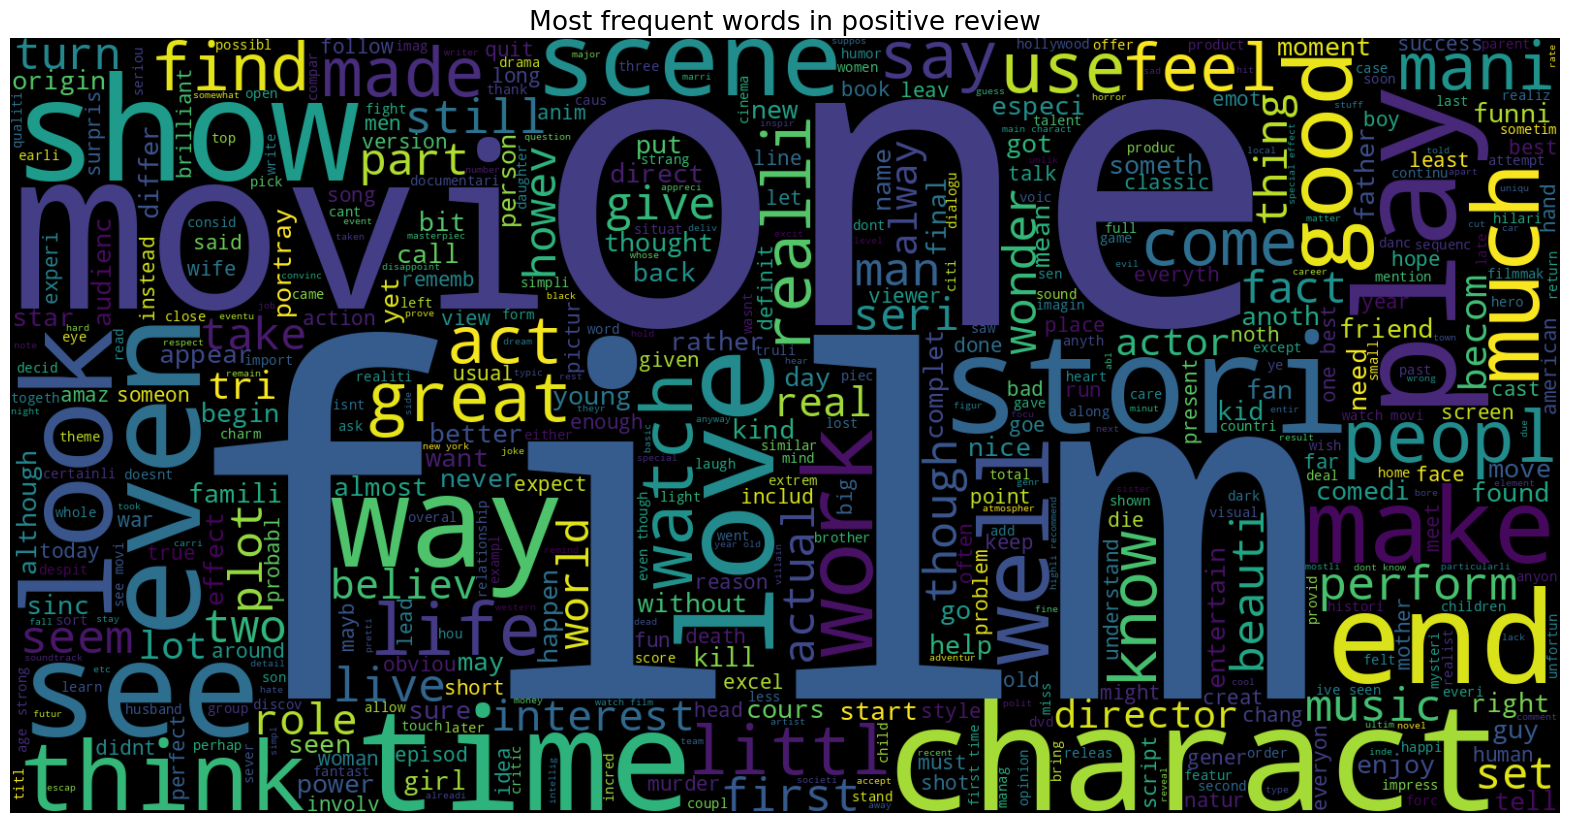

In [173]:
# Positive Words

pos_words = ' '.join([text for text in df['review'][df['sentiment']==1]])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(pos_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive review', fontsize=19)
plt.show()

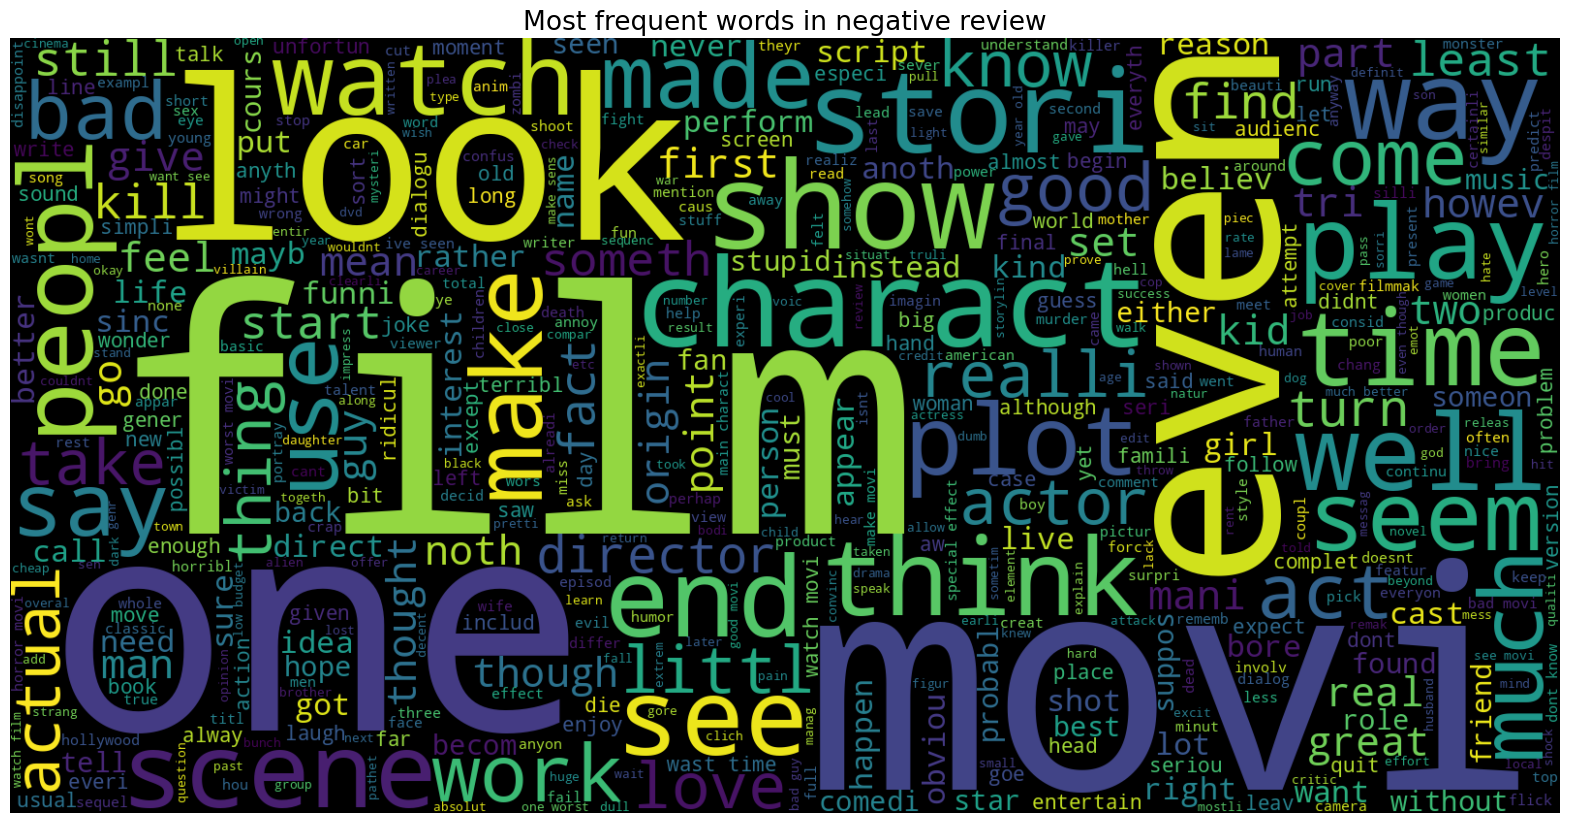

In [171]:
# Ngeative Words

pos_words = ' '.join([text for text in df['review'][df['sentiment']==0]])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(pos_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative review', fontsize=19)
plt.show()

In [174]:
# Let's calculate the Positivity and Subjectivity from the dataset

""" The first one is Polarity, which indicates the positivity/negativity in the sentiment of the text. The second one is subjectivity which refers to objective info/facts versus personal opinions or emotions."""


' The first one is Polarity, which indicates the positivity/negativity in the sentiment of the text. The second one is subjectivity which refers to objective info/facts versus personal opinions or emotions.'

In [181]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)

In [177]:
df.head()

,review,sentiment,polarity,subjectivity
0,one review mention watch episod youll hook rig...,1,0.006566,0.454900
1,wonder littl product film techniqu unassum old...,1,0.235000,0.235000
2,thought wonder way spend time hot summer weeke...,1,0.347143,0.527143
3,basic there famili littl boy jake think there ...,0,-0.008333,0.484722
4,petter mattei love time money visual stun film...,1,0.193900,0.321292


In [182]:
""" Thank you """

' Thank you '